In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import save_model

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = keras.models.load_model('mnist_gan')

In [3]:
get_image = K.function([model.layers[5].input, K.learning_phase()],
                           [model.layers[-1].output])

In [4]:
N = 20
images = [0]*N
vectors = [0]*N
for i in range(N):
    images[i] = [0]*N
    vectors[i] = [0]*N
for f in range(N):
    for j in range(N):
        vectors[f][j] = np.array([f/N, j/N])
        images[f][j] = get_image([vectors[f][j].reshape(-1,2)])[0].reshape(28, 28)

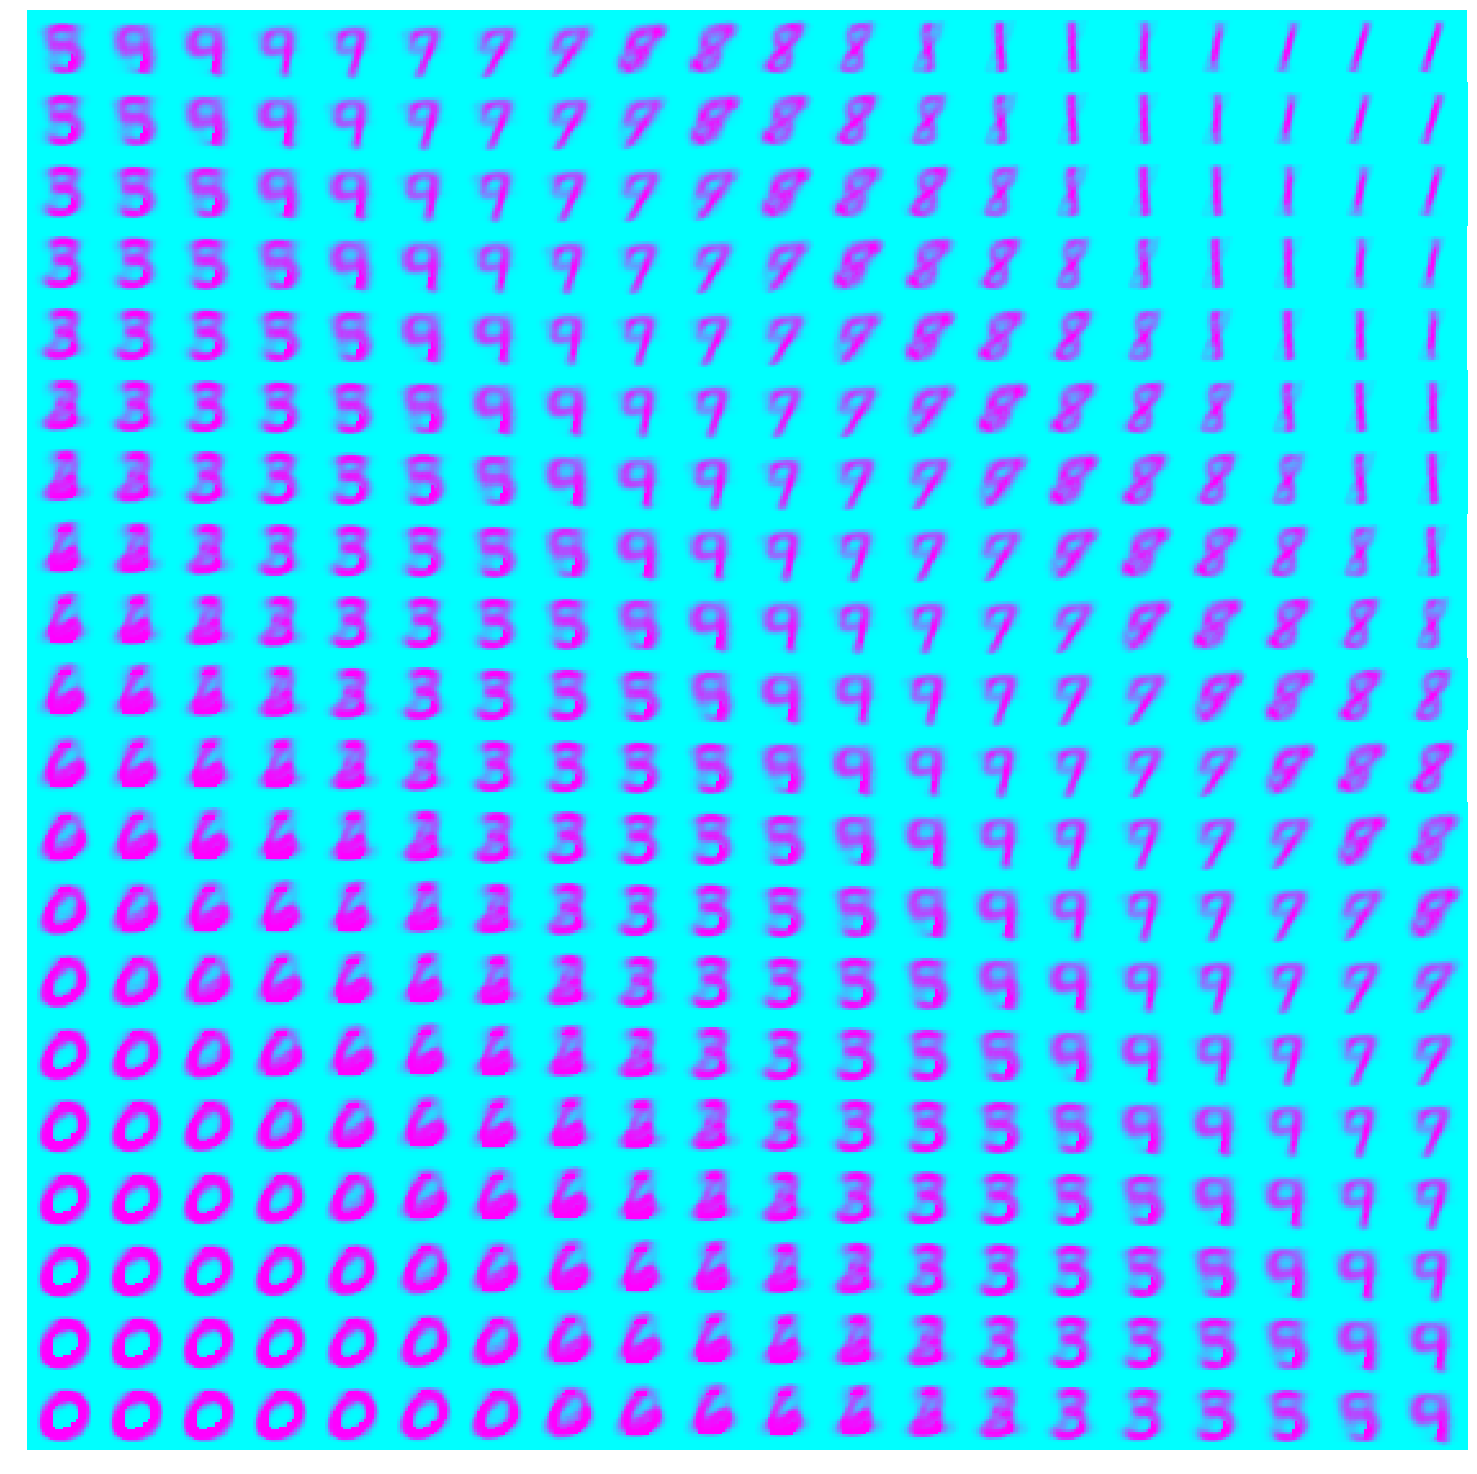

In [5]:
nrow = N
ncol = N

fig = plt.figure(figsize=(ncol+1, nrow+1)) 

gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, 
         top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
         left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 

for i in range(nrow):
    for j in range(ncol):
        im = images[i][j]
        ax= plt.subplot(gs[i,j])
        ax.imshow(im, cmap='cool')
        plt.axis('off')
#         ax.set_xticklabels([])
#         ax.set_yticklabels([])

plt.show()